# Math 110B Project 2: Random or not so random?
### Group Member: Yitan Ze, Yuan Fu, Junlin Wang
## Task 1

In [105]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].
from __future__ import division
import numpy as np
import math

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        
        return np.random.uniform(mu - sigma/math.sqrt(3), mu + sigma/math.sqrt(3), n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")


In [106]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")
x0 = 0
#yk = 1/(k+1)  step length 


In [107]:
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    #print(ordering)
    x0 = 0
    xk = x0
    Listobj = []
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.        
    for i in range(n):
        target = y[ordering[i]]
        gama = 1/ (i + 1)
        xk = xk - gama*(xk - target)
        objk = 0
        for j in y:
            objk += (xk - j)**2
        objk = objk/2
        Listobj.append(objk)  
    return xk, Listobj

xk1 ,Listobj1 = IGD_wr_task1(y1)

xk2 ,Listobj2 = IGD_wr_task1(y2)


def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    #print(ordering)
    Listx = []
    Listobj = []
    x0 = 0
    xk = x0
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    for i in range(n):
        target = y[ordering[i]]
        gama = 1/ (i + 1)
        xk = xk - gama*(xk - target)
        Listx.append(xk)
        objk = 0
        for j in y:
            objk += (xk - j)**2
        objk = objk/2
        Listobj.append(objk)       
    return xk, Listobj #Listx

xk1_no ,Listobj1_no = IGD_wo_task1(y1)

xk2_no ,Listobj2_no = IGD_wo_task1(y2)


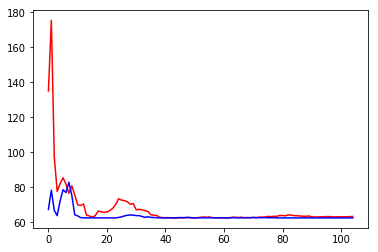

In [108]:
import matplotlib.pyplot as plt

plt.plot(np.arange(105), Listobj1, 'r')
plt.plot(np.arange(105), Listobj1_no, 'b')
plt.show()


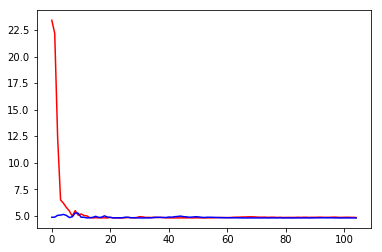

In [109]:
plt.plot(np.arange(105), Listobj2, 'r')
plt.plot(np.arange(105), Listobj2_no, 'b')
plt.show()


#### For task 1, ordering without replacement works better. 
The proof that IGD_wo_task1 must converge to the true solution is attached in our github repo.


## Task 2

In [137]:
beta_lst = np.random.uniform(1, 2, 105)
#y=1
def IGD_wr_task2(beta_lst):
    y=1
    n = len(beta_lst)
    ordering = np.random.choice(n, n, replace=True)
    
    x0 = 0
    xk = x0
    Listobj = []
    #beta_lst = np.random.uniform(1, 2, n)
    gama = 0.95*np.min(1/beta_lst)
    for i in range(n):
        #target = y[ordering[i]]
        beta = beta_lst[ordering[i]]     
        xk = xk - gama*beta*(xk - y)
        objk = 0
        for j in beta_lst:
            objk += j*(xk - y)**2
        objk = objk/2
        Listobj.append(objk)  
    return xk, Listobj

xk1 ,Listobj1 = IGD_wr_task2(beta_lst)

xk2 ,Listobj2 = IGD_wr_task2(beta_lst)


def IGD_wo_task2(beta_lst):
    y=1
    n = len(beta_lst)
    ordering = np.random.choice(n, n, replace=False)
    
    x0 = 0
    xk = x0
    Listobj = []
    #beta_lst = np.random.uniform(1, 2, n)
    gama = 0.95*np.min(1/beta_lst)
    for i in range(n):
        #target = y[ordering[i]]
        beta = beta_lst[ordering[i]]  
        xk = xk - gama*beta*(xk - y)
        objk = 0
        for j in beta_lst:
            objk += j*(xk - y)**2
        objk = objk/2
        Listobj.append(objk)  
    return xk, Listobj

xk1_no ,Listobj1_no = IGD_wo_task2(beta_lst)

xk2_no ,Listobj2_no = IGD_wo_task2(beta_lst)



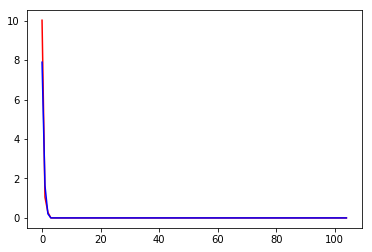

In [138]:
plt.plot(np.arange(105), Listobj1, 'r')
plt.plot(np.arange(105), Listobj1_no, 'b')
plt.show()

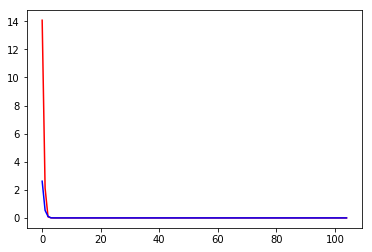

In [139]:
plt.plot(np.arange(105), Listobj2, 'r')
plt.plot(np.arange(105), Listobj2_no, 'b')
plt.show()

##### For task 2 1-D dimension example, it seems that the ordering without replacement works better.  

## Task 3

In [130]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = np.dot(A,x) + w
    return A, x, y
A1, xstar1, y1 = generate_problem_task3(200, 100, 0.01)
A2, xstar2, y2 = generate_problem_task3(200, 100, 0.01)

In [131]:
from numpy import linalg as LA

In [132]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
round_num = 10
def IGD_wr_task3(y, A, xstar):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    n = len(y)
    x0 = np.zeros(A.shape[1])
    xk = x0
    Listobj = []
    Listxk = []
    step_size = 10**(-3)
    for each in range(round_num):
        ordering = np.random.choice(n, n, replace=True)
        for i in range(n):
            target = y[ordering[i]]
            ak = A[ordering[i],:]
            xk = xk - step_size*ak*(np.dot(ak,xk) - target)
            objk = 0
            for j in range(n):
                a = A[j,:]
                objk += (np.dot(a,xk) - y[j])**2
            Listobj.append(objk)
            xkdif = LA.norm(xk-xstar)
            Listxk.append(xkdif)
    return xk, Listobj,Listxk

xk1 ,Listobj1,Listxk1 = IGD_wr_task3(y1,A1, xstar1)
xk2 ,Listobj2,Listxk2 = IGD_wr_task3(y2,A2, xstar2)

# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A, xstar):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    x0 = np.zeros(A.shape[1])
    xk = x0
    Listobj = []
    Listxk = []
    step_size = 10**(-3)
    for each in range(round_num):
        for i in range(n):
            target = y[ordering[i]]
            ak = A[ordering[i],:]
            xk = xk - step_size*ak*(np.dot(ak,xk) - target)
            objk = 0
            for j in range(n):
                a = A[j,:]
                objk += (np.dot(a,xk) - y[j])**2
            Listobj.append(objk)  
            xkdif = LA.norm(xk-xstar)
            Listxk.append(xkdif)
    return xk, Listobj,Listxk

xk1_no ,Listobj1_no, Listxk1_no = IGD_wo_task3(y1,A1, xstar1)

xk2_no ,Listobj2_no, Listxk2_no = IGD_wo_task3(y2,A2, xstar2)

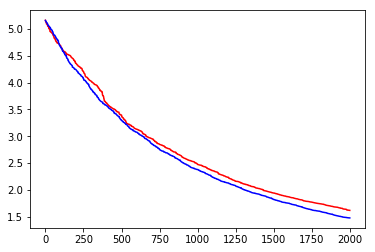

In [133]:
plt.plot(np.arange(len(Listobj1)), Listxk1, 'r')
plt.plot(np.arange(len(Listobj1_no)), Listxk1_no, 'b')
plt.show()

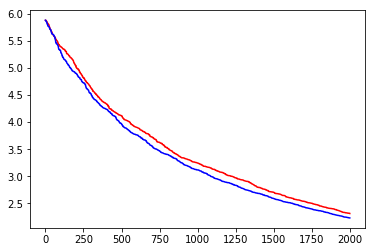

In [134]:
plt.plot(np.arange(len(Listobj1)), Listxk2, 'r')
plt.plot(np.arange(len(Listobj1_no)), Listxk2_no, 'b')
plt.show()

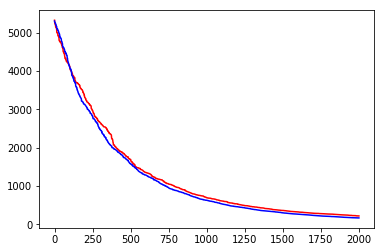

In [135]:
plt.plot(np.arange(len(Listobj1)), Listobj1, 'r')
plt.plot(np.arange(len(Listobj1_no)), Listobj1_no, 'b')
plt.show()

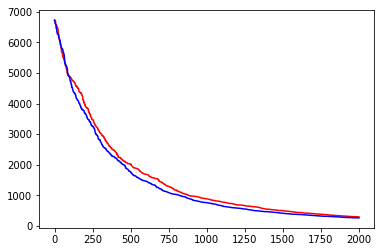

In [136]:
plt.plot(np.arange(len(Listobj2)), Listobj2, 'r')
plt.plot(np.arange(len(Listobj2_no)), Listobj2_no, 'b')
plt.show()

##### For task 3 , it seems that the ordering without replacement works better.  